In [3]:
import pandas as pd
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew
import warnings
from datetime import datetime
from sklearn.preprocessing import RobustScaler, StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [4]:
breach1 = pd.read_csv("Privacy_Rights_Clearinghouse-Data-Breaches-Export 2005-2011.csv")

In [5]:
breach2 = pd.read_csv("Privacy_Rights_Clearinghouse-Data-Breaches-Export 2012-2019.csv")

In [6]:
breach_com = pd.concat([breach1, breach2], axis=0).reset_index(drop=True)

In [7]:
data5 = pd.read_csv("05-11.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (26,30,948,949,950,955,970) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
data6 = pd.read_csv("12-19.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (26,30,948,949,950,955,970,975) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
combined = pd.concat([data5, data6], axis=0).reset_index(drop=True)

In [10]:
combined.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
0,1004,20050531,2004.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,1.0,5080,110.0,925.0,B,IL,0.0,www.aarcorp.com,NaN,19880101.0
1,1004,20060531,2005.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,1.0,5080,110.0,925.0,B,IL,0.0,www.aarcorp.com,NaN,19880101.0
2,1004,20070531,2006.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,1.0,5080,110.0,925.0,B,IL,0.0,www.aarcorp.com,NaN,19880101.0
3,1004,20080531,2007.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,1.0,5080,110.0,925.0,B,IL,0.0,www.aarcorp.com,NaN,19880101.0
4,1004,20090531,2008.0,INDL,C,D,STD,AIR,000361105,AAR CORP,...,1.0,5080,110.0,925.0,B,IL,0.0,www.aarcorp.com,NaN,19880101.0


In [11]:
matched_company = pd.read_csv("extracted_matched_company.csv")

In [12]:
matched_company

,Unnamed: 0,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
0,20,1045,20051231,2005.0,INDL,C,D,STD,AAL,02376R102,...,4.0,4512,605.0,600.0,B-,TX,0.0,www.aa.com,NaN,NaN
1,21,1045,20061231,2006.0,INDL,C,D,STD,AAL,02376R102,...,4.0,4512,605.0,600.0,B-,TX,0.0,www.aa.com,NaN,NaN
2,22,1045,20071231,2007.0,INDL,C,D,STD,AAL,02376R102,...,4.0,4512,605.0,600.0,B-,TX,0.0,www.aa.com,NaN,NaN
3,23,1045,20081231,2008.0,INDL,C,D,STD,AAL,02376R102,...,4.0,4512,605.0,600.0,B-,TX,0.0,www.aa.com,NaN,NaN
4,24,1045,20091231,2009.0,INDL,C,D,STD,AAL,02376R102,...,4.0,4512,605.0,600.0,B-,TX,0.0,www.aa.com,NaN,NaN
5,25,1045,20101231,2010.0,INDL,C,D,STD,AAL,02376R102,...,4.0,4512,605.0,600.0,B-,TX,0.0,www.aa.com,NaN,NaN
6,26,1045,20111231,2011.0,INDL,C,D,STD,AAL,02376R102,...,4.0,4512,605.0,600.0,B-,TX,0.0,www.aa.com,NaN,NaN
7,66,1076,20051231,2005.0,INDL,C,D,STD,AAN,002535300,...,1.0,7359,175.0,976.0,B+,GA,0.0,www.aarons.com,NaN,NaN
8,67,1076,20061231,2006.0,INDL,C,D,STD,AAN,002535300,...,1.0,7359,175.0,976.0,B+,GA,0.0,www.aarons.com,NaN,NaN
9,68,1076,20071231,2007.0,INDL,C,D,STD,AAN,002535300,...,1.0,7359,175.0,976.0,B+,GA,0.0,www.aarons.com,NaN,NaN


In [35]:
extracted_fr = pd.read_csv("extracted_fr.csv")

In [36]:
extracted_fr.shape

(536, 983)

In [37]:
year_matched = pd.read_csv("year_matched.csv")

In [38]:
extracted_fr.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [39]:
year_matched

,Unnamed: 0,index_fr,index_db,company_name_processed,company_name_ori_fr,company_name_ori_db,year
0,0,22,427,american airlines,American Airlines Group Inc,American Airlines,2007
1,1,26,2244,american airlines,American Airlines Group Inc,American Airlines,2011
2,2,72,2755,aarons,Aaron's Inc,Aaron's,2011
3,3,184,864,aetna,Aetna Inc.,Aetna,2009
4,4,185,864,aetna,Aetna Inc.,Aetna,2009
5,5,186,1349,aetna,Aetna Inc.,Aetna,2010
6,6,186,3059,aetna,Aetna Inc.,"Aetna, Inc.",2010
7,7,187,1349,aetna,Aetna Inc.,Aetna,2010
8,8,187,3059,aetna,Aetna Inc.,"Aetna, Inc.",2010
9,9,341,1029,honeywell international,Honeywell International Inc,Honeywell International,2006


In [40]:
combined["target_y"] = 0

In [41]:
combined.loc[year_matched.index_fr, 'target_y'] = 1

In [42]:
combined[combined.target_y == 1].shape

(457, 982)

In [43]:
combined.shape[0]

175077

In [22]:
year_matched.shape[0]/combined.shape[0]

0.003061510078422637

In [44]:
null_percent = extracted_fr.isnull().sum()/extracted_fr.isnull().count()

In [45]:
null_percent.xt

0.7817164179104478

In [46]:
extracted_fr.drop(['comname'], axis = 1, inplace = True)

In [52]:
extracted_com = null_percent[null_percent < 0.8].index.drop(['comname'])

In [53]:
combined.columns

Index(['gvkey', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc', 'datafmt',
       'tic', 'cusip', 'conm',
       ...
       'sic', 'spcindcd', 'spcseccd', 'spcsrc', 'state', 'stko', 'weburl',
       'dldte', 'ipodate', 'target_y'],
      dtype='object', length=982)

In [54]:
list(extracted_com)+ ['target_y']

['gvkey',
 'datadate',
 'fyear',
 'indfmt',
 'consol',
 'popsrc',
 'datafmt',
 'tic',
 'cusip',
 'conm',
 'acctstd',
 'ajex',
 'ajp',
 'bspr',
 'compst',
 'curcd',
 'curncd',
 'currtr',
 'final',
 'fyr',
 'ismod',
 'ltcm',
 'pddur',
 'scf',
 'src',
 'upd',
 'apdedate',
 'fdate',
 'pdate',
 'acchg',
 'acdo',
 'aco',
 'acodo',
 'acominc',
 'acox',
 'act',
 'aldo',
 'am',
 'amgw',
 'ano',
 'ao',
 'aocidergl',
 'aociother',
 'aocipen',
 'aocisecgl',
 'aodo',
 'aol2',
 'aoloch',
 'aox',
 'ap',
 'apalch',
 'aqa',
 'aqc',
 'aqd',
 'aqeps',
 'aqi',
 'aqp',
 'aqpl1',
 'aqs',
 'at',
 'aul3',
 'bkvlps',
 'caps',
 'capx',
 'capxv',
 'ceq',
 'ceql',
 'ceqt',
 'cfpdo',
 'ch',
 'che',
 'chech',
 'ci',
 'cibegni',
 'cicurr',
 'cidergl',
 'cimii',
 'ciother',
 'cipen',
 'cisecgl',
 'citotal',
 'cld2',
 'cld3',
 'cld4',
 'cld5',
 'clg',
 'cmp',
 'cogs',
 'cshfd',
 'cshi',
 'csho',
 'cshpri',
 'cshr',
 'cstk',
 'cstkcv',
 'cstke',
 'dc',
 'dclo',
 'dcom',
 'dcpstk',
 'dcs',
 'dcvsr',
 'dcvsub',
 'dcvt',


In [55]:
combined_extracted = combined[list(extracted_com) + ['target_y']]

In [56]:
combined_extracted.shape

(175077, 451)

In [57]:
num_col = combined_extracted.select_dtypes(exclude = "object")

In [58]:
num_col.shape

(175077, 421)

In [876]:
X = num_col[num_col.columns[num_col.columns != 'target_y']]

In [877]:
X.shape

(175077, 420)

In [878]:
X = X.fillna(X.mean())

In [879]:
y = num_col.target_y

In [880]:
y

0         0
1         0
2         0
3         0
4         0
         ..
175072    0
175073    0
175074    0
175075    0
175076    0
Name: target_y, Length: 175077, dtype: int64

In [938]:
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
y_true = [0, 1, 1, 0, 1, 1]
y_pred = [0, 0, 1, 1, 1, 1]
e = confusion_matrix(y_true, y_pred)
(e[0][1] + e[1][1])/

array([[1, 1],
       [1, 3]])

In [939]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
len_test = y_train.shape[0]
num_positive_in_train = y_train[y_train == 1].shape[0]
num_positive_in_test = y_test[y_test == 1].shape[0]
print("positive cases in training data : {}".format(num_positive_in_train))
print("positive cases in testing data : {}".format(num_positive_in_test))
pos_train_x = X_train[y_train == 1]
pos_train_y = y_train[y_train == 1]
print(pos_train_x.shape)
print(pos_train_y.shape)
neg_train_x = X_train[y_train == 0]
neg_train_y = y_train[y_train == 0]
print(neg_train_x.shape)
print(neg_train_y.shape)

neg_pos_ratio = 1

recalls = []
precisions = []
f1_scores = []
pos_pred_ratio = []

for neg_pos_ratio in range(1,50):

    from sklearn.metrics import confusion_matrix
    sampled_neg_data = neg_pos_ratio * num_positive_in_train
    sampled_neg_train_y = neg_train_y.sample(n = sampled_neg_data, random_state=1)
    sampled_neg_train_x = neg_train_x.loc[sampled_neg_train_y.index]
    print("sampled negative class shape of x: {}".format(sampled_neg_train_x.shape))
    print("sampled negative class shape of y: {}".format(sampled_neg_train_y.shape))
    #print(sampled_neg_train_y.shape)
    total_x = pd.concat([pos_train_x, sampled_neg_train_x], axis = 0)
    total_y = pd.concat([pos_train_y, sampled_neg_train_y], axis = 0)
    total_data = pd.concat([total_x, total_y], axis = 1)
    randomed_data = total_data.sample(frac=1, random_state=1)
    x_train = randomed_data.drop(['target_y'], axis = 1)
    y_train = randomed_data.target_y
    clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0, solver = 'lbfgs'))
    clf.fit(x_train, y_train)
    y_pred = clf.predict(X_test)
    #print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)
    print(classification_report(y_test, y_pred))
    print(recall_score(y_test, y_pred))
    #e = confusion_matrix(y_true, y_pred)
    pos_pred_ratio.append((confusion_matrix[0][1] + confusion_matrix[1][1])/len_test)
    recalls.append(recall_score(y_test, y_pred))
    #print(precision_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    #logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
    #fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    #plt.figure()
    #plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    #plt.plot([0, 1], [0, 1],'r--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver operating characteristic')
    #plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    #plt.show()
    #feature_importance = pd.Series(clf.steps[1][1].coef_[0], index = x_train.columns).sort_values(ascending = False)[:10]
    #print(feature_importance)
    #sns.barplot(feature_importance.index, feature_importance.values)

positive cases in training data : 318
positive cases in testing data : 139
(318, 420)
(318,)
(122235, 420)
(122235,)
sampled negative class shape of x: (318, 420)
sampled negative class shape of y: (318,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[44410  7975]
 [   26   113]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     52385
           1       0.01      0.81      0.03       139

    accuracy                           0.85     52524
   macro avg       0.51      0.83      0.47     52524
weighted avg       1.00      0.85      0.92     52524

0.8129496402877698
sampled negative class shape of x: (636, 420)
sampled negative class shape of y: (636,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[47413  4972]
 [   41    98]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     52385
           1       0.02      0.71      0.04       139

    accuracy                           0.90     52524
   macro avg       0.51      0.81      0.49     52524
weighted avg       1.00      0.90      0.95     52524

0.7050359712230215
sampled negative class shape of x: (954, 420)
sampled negative class shape of y: (954,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[48759  3626]
 [   43    96]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     52385
           1       0.03      0.69      0.05       139

    accuracy                           0.93     52524
   macro avg       0.51      0.81      0.51     52524
weighted avg       1.00      0.93      0.96     52524

0.6906474820143885
sampled negative class shape of x: (1272, 420)
sampled negative class shape of y: (1272,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[49498  2887]
 [   53    86]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     52385
           1       0.03      0.62      0.06       139

    accuracy                           0.94     52524
   macro avg       0.51      0.78      0.51     52524
weighted avg       1.00      0.94      0.97     52524

0.6187050359712231
sampled negative class shape of x: (1590, 420)
sampled negative class shape of y: (1590,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[50094  2291]
 [   55    84]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     52385
           1       0.04      0.60      0.07       139

    accuracy                           0.96     52524
   macro avg       0.52      0.78      0.52     52524
weighted avg       1.00      0.96      0.97     52524

0.60431654676259
sampled negative class shape of x: (1908, 420)
sampled negative class shape of y: (1908,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[50300  2085]
 [   63    76]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     52385
           1       0.04      0.55      0.07       139

    accuracy                           0.96     52524
   macro avg       0.52      0.75      0.52     52524
weighted avg       1.00      0.96      0.98     52524

0.5467625899280576
sampled negative class shape of x: (2226, 420)
sampled negative class shape of y: (2226,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[50492  1893]
 [   64    75]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     52385
           1       0.04      0.54      0.07       139

    accuracy                           0.96     52524
   macro avg       0.52      0.75      0.53     52524
weighted avg       1.00      0.96      0.98     52524

0.539568345323741
sampled negative class shape of x: (2544, 420)
sampled negative class shape of y: (2544,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[50617  1768]
 [   75    64]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     52385
           1       0.03      0.46      0.06       139

    accuracy                           0.96     52524
   macro avg       0.52      0.71      0.52     52524
weighted avg       1.00      0.96      0.98     52524

0.460431654676259
sampled negative class shape of x: (2862, 420)
sampled negative class shape of y: (2862,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[50766  1619]
 [   75    64]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     52385
           1       0.04      0.46      0.07       139

    accuracy                           0.97     52524
   macro avg       0.52      0.71      0.53     52524
weighted avg       1.00      0.97      0.98     52524

0.460431654676259
sampled negative class shape of x: (3180, 420)
sampled negative class shape of y: (3180,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[50872  1513]
 [   80    59]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     52385
           1       0.04      0.42      0.07       139

    accuracy                           0.97     52524
   macro avg       0.52      0.70      0.53     52524
weighted avg       1.00      0.97      0.98     52524

0.4244604316546763
sampled negative class shape of x: (3498, 420)
sampled negative class shape of y: (3498,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[50957  1428]
 [   81    58]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     52385
           1       0.04      0.42      0.07       139

    accuracy                           0.97     52524
   macro avg       0.52      0.70      0.53     52524
weighted avg       1.00      0.97      0.98     52524

0.4172661870503597
sampled negative class shape of x: (3816, 420)
sampled negative class shape of y: (3816,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51069  1316]
 [   84    55]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     52385
           1       0.04      0.40      0.07       139

    accuracy                           0.97     52524
   macro avg       0.52      0.69      0.53     52524
weighted avg       1.00      0.97      0.98     52524

0.39568345323741005
sampled negative class shape of x: (4134, 420)
sampled negative class shape of y: (4134,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51096  1289]
 [   83    56]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52385
           1       0.04      0.40      0.08       139

    accuracy                           0.97     52524
   macro avg       0.52      0.69      0.53     52524
weighted avg       1.00      0.97      0.98     52524

0.4028776978417266
sampled negative class shape of x: (4452, 420)
sampled negative class shape of y: (4452,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51182  1203]
 [   85    54]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52385
           1       0.04      0.39      0.08       139

    accuracy                           0.98     52524
   macro avg       0.52      0.68      0.53     52524
weighted avg       1.00      0.98      0.99     52524

0.38848920863309355
sampled negative class shape of x: (4770, 420)
sampled negative class shape of y: (4770,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51242  1143]
 [   85    54]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52385
           1       0.05      0.39      0.08       139

    accuracy                           0.98     52524
   macro avg       0.52      0.68      0.53     52524
weighted avg       1.00      0.98      0.99     52524

0.38848920863309355
sampled negative class shape of x: (5088, 420)
sampled negative class shape of y: (5088,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51337  1048]
 [   85    54]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52385
           1       0.05      0.39      0.09       139

    accuracy                           0.98     52524
   macro avg       0.52      0.68      0.54     52524
weighted avg       1.00      0.98      0.99     52524

0.38848920863309355
sampled negative class shape of x: (5406, 420)
sampled negative class shape of y: (5406,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51372  1013]
 [   90    49]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52385
           1       0.05      0.35      0.08       139

    accuracy                           0.98     52524
   macro avg       0.52      0.67      0.54     52524
weighted avg       1.00      0.98      0.99     52524

0.35251798561151076
sampled negative class shape of x: (5724, 420)
sampled negative class shape of y: (5724,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51419   966]
 [   91    48]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52385
           1       0.05      0.35      0.08       139

    accuracy                           0.98     52524
   macro avg       0.52      0.66      0.54     52524
weighted avg       1.00      0.98      0.99     52524

0.34532374100719426
sampled negative class shape of x: (6042, 420)
sampled negative class shape of y: (6042,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51449   936]
 [   89    50]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52385
           1       0.05      0.36      0.09       139

    accuracy                           0.98     52524
   macro avg       0.52      0.67      0.54     52524
weighted avg       1.00      0.98      0.99     52524

0.3597122302158273
sampled negative class shape of x: (6360, 420)
sampled negative class shape of y: (6360,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51456   929]
 [   88    51]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52385
           1       0.05      0.37      0.09       139

    accuracy                           0.98     52524
   macro avg       0.53      0.67      0.54     52524
weighted avg       1.00      0.98      0.99     52524

0.3669064748201439
sampled negative class shape of x: (6678, 420)
sampled negative class shape of y: (6678,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51472   913]
 [   91    48]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52385
           1       0.05      0.35      0.09       139

    accuracy                           0.98     52524
   macro avg       0.52      0.66      0.54     52524
weighted avg       1.00      0.98      0.99     52524

0.34532374100719426
sampled negative class shape of x: (6996, 420)
sampled negative class shape of y: (6996,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51496   889]
 [   91    48]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52385
           1       0.05      0.35      0.09       139

    accuracy                           0.98     52524
   macro avg       0.52      0.66      0.54     52524
weighted avg       1.00      0.98      0.99     52524

0.34532374100719426
sampled negative class shape of x: (7314, 420)
sampled negative class shape of y: (7314,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51537   848]
 [   92    47]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52385
           1       0.05      0.34      0.09       139

    accuracy                           0.98     52524
   macro avg       0.53      0.66      0.54     52524
weighted avg       1.00      0.98      0.99     52524

0.3381294964028777
sampled negative class shape of x: (7632, 420)
sampled negative class shape of y: (7632,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51555   830]
 [   89    50]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52385
           1       0.06      0.36      0.10       139

    accuracy                           0.98     52524
   macro avg       0.53      0.67      0.54     52524
weighted avg       1.00      0.98      0.99     52524

0.3597122302158273
sampled negative class shape of x: (7950, 420)
sampled negative class shape of y: (7950,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51598   787]
 [   87    52]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     52385
           1       0.06      0.37      0.11       139

    accuracy                           0.98     52524
   macro avg       0.53      0.68      0.55     52524
weighted avg       1.00      0.98      0.99     52524

0.37410071942446044
sampled negative class shape of x: (8268, 420)
sampled negative class shape of y: (8268,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51641   744]
 [   90    49]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     52385
           1       0.06      0.35      0.11       139

    accuracy                           0.98     52524
   macro avg       0.53      0.67      0.55     52524
weighted avg       1.00      0.98      0.99     52524

0.35251798561151076
sampled negative class shape of x: (8586, 420)
sampled negative class shape of y: (8586,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51649   736]
 [   91    48]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     52385
           1       0.06      0.35      0.10       139

    accuracy                           0.98     52524
   macro avg       0.53      0.67      0.55     52524
weighted avg       1.00      0.98      0.99     52524

0.34532374100719426
sampled negative class shape of x: (8904, 420)
sampled negative class shape of y: (8904,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51670   715]
 [   92    47]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     52385
           1       0.06      0.34      0.10       139

    accuracy                           0.98     52524
   macro avg       0.53      0.66      0.55     52524
weighted avg       1.00      0.98      0.99     52524

0.3381294964028777
sampled negative class shape of x: (9222, 420)
sampled negative class shape of y: (9222,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[51704   681]
 [   93    46]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     52385
           1       0.06      0.33      0.11       139

    accuracy                           0.99     52524
   macro avg       0.53      0.66      0.55     52524
weighted avg       1.00      0.99      0.99     52524

0.33093525179856115


Text(0, 0.5, 'testing performance of positive class')

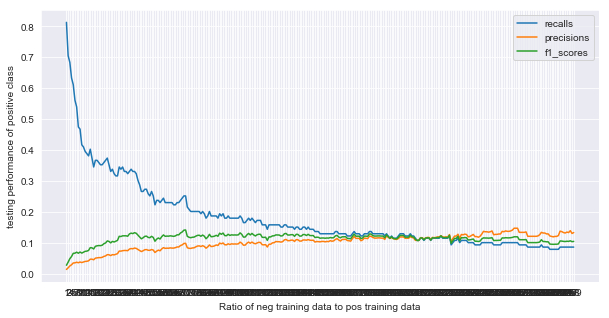

In [919]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
fig, ax = plt.subplots()
locs, labels = plt.xticks()
plt.xticks(np.arange(0, len(recalls), step=1), np.arange(1, len(recalls)+1, step=1))
ax.plot(recalls, label='recalls')
ax.plot(precisions, label='precisions')
ax.plot(f1_scores, label='f1_scores')
ax.legend()
plt.xlabel("Ratio of neg training data to pos training data")
plt.ylabel("testing performance of positive class")

In [884]:
X.shape

(175077, 420)

In [885]:
def split_pos_new(X, y):
    pos_y = y[y == 1]
    pos_x = X[y == 1]
    neg_y = y[y == 0]
    neg_x = X[y == 0]
    pos_class = pd.concat([pos_x, pos_y], axis = 1)
    neg_class = pd.concat([neg_x, neg_y], axis = 1)
    return pos_class, neg_class

In [886]:
pos_class, neg_class = split_pos_new(X, y)
#randomly sample 30 percent of positive instances as test data 
pos_test = pos_class.sample(frac=0.3)
#rest of the pos data
pos_train = pos_class[~pos_class.index.isin(pos_test.index)]
#assume the pos and neg data has same ratio
neg_test = neg_class.sample(n = pos_test.shape[0])
#rest of the neg data
neg_train = neg_class[~neg_class.index.isin(neg_test.index)]
total_test = pd.concat([pos_test, neg_test], axis = 0).sample(frac = 1)

In [907]:
#total_test.drop(['target_y'], axis = 1)
from sklearn.base import clone
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0, solver = 'liblinear'))

In [908]:
ORIGINAL_DISTRIBUTION = 0
HALF_DISTRIBUTION = 1


class Voting_under_sample:
    
    def __init__(self, X, y, clf, test_distri = 1, num = 1):
        self.X = X
        self.y = y
        
        # test data follow the 1:1 distribution of pos and neg classes instances
        if test_distri == HALF_DISTRIBUTION:
            pos_y = y[y == 1]
            pos_x = X[y == 1]
            neg_y = y[y == 0]
            neg_x = X[y == 0]
            pos_class = pd.concat([pos_x, pos_y], axis = 1)
            neg_class = pd.concat([neg_x, neg_y], axis = 1)
            #randomly sample 30 percent of positive instances as test data 
            pos_test = pos_class.sample(frac=0.3)
            #rest of the pos data
            self.pos_train = pos_class[~pos_class.index.isin(pos_test.index)]
            #assume the pos and neg data has same ratio
            neg_test = neg_class.sample(n = pos_test.shape[0])
            #rest of the neg data
            self.neg_train = neg_class[~neg_class.index.isin(neg_test.index)]
            total_test = pd.concat([pos_test, neg_test], axis = 0).sample(frac = 1)
            self.X_test = total_test.drop(['target_y'], axis = 1)
            self.y_test = total_test.target_y
        
        # test data follow the original data set distribution 0.0027
        else:
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y)
            self.X_test = X_test
            self.y_test = y_test

            pos_train_x = X_train[y_train == 1]
            neg_train_x = X_train[y_train == 0]
            pos_train_y = y_train[y_train == 1]
            neg_train_y = y_train[y_train == 0]
            self.pos_train = pd.concat([pos_train_x, pos_train_y], axis = 1)
            self.neg_train = pd.concat([neg_train_x, neg_train_y], axis = 1)
            
            
        #set the basic classifier and the number of classifier participate the voting
        self.ratio = num
        self.pos_shape = self.pos_train.shape[0]
        self.neg_shape = num*self.pos_shape
        self.neg_selected = self.neg_train.sample(n = self.neg_shape)
        self.neg_train_components = np.array_split(self.neg_selected.sample(frac = 1), num)
        self.clf = clf
        self.models = []
        self.predictions = []
        
    def train(self):
        for i in range(self.ratio):
            neg_train_ = self.neg_train_components[i]
            total_train = pd.concat([self.pos_train, neg_train_], axis = 0).sample(frac = 1)
            X_train = total_train.drop(['target_y'], axis = 1)
            y_train = total_train.target_y
            new_clf = clone(clf)
            self.models.append(new_clf.fit(X_train, y_train))
    
    
    def test(self):
        for i in range(self.ratio):
            self.predictions.append(self.models[i].predict(self.X_test).T)
        self.predictions = pd.DataFrame.from_records(self.predictions).T
        self.predictions['sum'] = self.predictions.apply(lambda row: row.sum(), axis=1)
        self.predictions['prediction'] = self.predictions['sum'].apply(lambda x: 1 if x >= (self.ratio/2) else 0)
        #print(predictions_)
        self.y_pred = self.predictions['prediction']
        
        
    def result(self):
        from sklearn.metrics import confusion_matrix
        from sklearn.metrics import classification_report
        #print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
        confusion_matrix = confusion_matrix(self.y_test, self.y_pred)
        print(confusion_matrix)
        print(classification_report(self.y_test, self.y_pred))
        
    
        
        
        
        

In [925]:
voting_ = Voting_under_sample(X, y, clf, ORIGINAL_DISTRIBUTION, 50)

In [926]:
voting_.train()

In [927]:
voting_.test()

In [928]:
voting_.result()

[[37039  6610]
 [   16   105]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     43649
           1       0.02      0.87      0.03       121

    accuracy                           0.85     43770
   macro avg       0.51      0.86      0.47     43770
weighted avg       1.00      0.85      0.92     43770



In [482]:
7/2

3.5

In [484]:
voting_.prediction

0      0
1      0
2      1
3      1
4      0
      ..
269    0
270    1
271    1
272    0
273    0
Name: prediction, Length: 274, dtype: int64

In [450]:
clf

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [854]:
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0, solver = 'liblinear'))

In [866]:
#####################################################################################################################
#####################################################################################################################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

recalls = []
precisions = []
accuracys = []

for i in range(100):
    neg_class_ = neg_class.sample(n = pos_class.shape[0])
    new_x = pd.concat([pos_class, neg_class_]).sample(frac=1).reset_index(drop=True)
    X_ = new_x.drop(['target_y'], axis = 1)
    y_ = new_x['target_y']
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
    #confusion_matrix = confusion_matrix(y_test, y_pred)
    #print(confusion_matrix)
    #print(classification_report(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    accuracys.append(accuracy_score(y_test, y_pred))
    #logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
    #fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    #plt.figure()
    #plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    #plt.plot([0, 1], [0, 1],'r--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver operating characteristic')
    #plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    #plt.show()
    #feature_importance = pd.Series(clf.steps[1][1].coef_[0], index = X.columns).sort_values(ascending = False)[:10]
    #print(feature_importance)
    #sns.barplot(feature_importance.index, feature_importance.values)

    

print(recalls)
print(precisions)
print(accuracys)
print("the mean of recalls is {}".format(np.mean(recalls)))
print("the mean of precisions is {}".format(np.mean(precisions)))
print("the mean of accuracys is {}".format(np.mean(accuracys)))

[0.7841726618705036, 0.875968992248062, 0.8251748251748252, 0.8175675675675675, 0.8071428571428572, 0.7761194029850746, 0.795774647887324, 0.8145161290322581, 0.8129496402877698, 0.7608695652173914, 0.7883211678832117, 0.7903225806451613, 0.8226950354609929, 0.8432835820895522, 0.8518518518518519, 0.9090909090909091, 0.8333333333333334, 0.8321678321678322, 0.7744360902255639, 0.8680555555555556, 0.8702290076335878, 0.7315436241610739, 0.823943661971831, 0.803030303030303, 0.8194444444444444, 0.7969924812030075, 0.8231292517006803, 0.8, 0.7941176470588235, 0.8345864661654135, 0.782608695652174, 0.8029197080291971, 0.7586206896551724, 0.8540145985401459, 0.7611940298507462, 0.8560606060606061, 0.8285714285714286, 0.8134328358208955, 0.8169014084507042, 0.803921568627451, 0.7803030303030303, 0.782608695652174, 0.8043478260869565, 0.7733333333333333, 0.7919463087248322, 0.8541666666666666, 0.8571428571428571, 0.8066666666666666, 0.7851851851851852, 0.7923076923076923, 0.7676056338028169, 0

In [870]:
np.array(accuracys).std()

0.024678668809619286

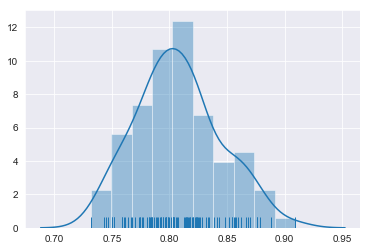

In [873]:
sns.distplot(recalls, kde=True, rug=True);

In [129]:
#percentage of attacked in the training data
num_positive_in_train = y_train[y_train == 1].shape[0]
num_positive_in_test = y_test[y_test == 1].shape[0]
print("positive cases in training data : {}".format(num_positive_in_train))
print("positive cases in testing data : {}".format(num_positive_in_test))

positive cases in training data : 319
positive cases in testing data : 138


In [800]:
pos_train_x = X_train[y_train == 1]
pos_train_y = y_train[y_train == 1]
print(pos_train_x.shape)
print(pos_train_y.shape)

(318, 420)
(318,)


In [804]:
neg_train_x = X_train[y_train == 0]
neg_train_y = y_train[y_train == 0]
print(neg_train_x.shape)
print(neg_train_y.shape)

(122235, 420)
(122235,)


In [820]:
sampled_neg_train_y = neg_train_y.sample(n = pos_train_y.shape[0])
sampled_neg_train_x = neg_train_x.loc[sampled_neg_train_y.index]
print(sampled_neg_train_x.shape)
print(sampled_neg_train_y.shape)

(318, 420)
(318,)


In [822]:
total_x = pd.concat([pos_train_x, sampled_neg_train_x], axis = 0)
total_y = pd.concat([pos_train_y, sampled_neg_train_y], axis = 0)

In [823]:
total_data = pd.concat([total_x, total_y], axis = 1)

In [827]:
total_data

,gvkey,datadate,fyear,ajex,ajp,currtr,fyr,ismod,ltcm,pddur,...,gsector,gsubind,naics,priusa,sic,spcindcd,spcseccd,stko,ipodate,target_y
23667,23877,20111231,2011.0,1.0000,1.0000,1.0000,12.0,1.000000,9.000000,12.0,...,35.000000,3.510203e+07,524114.000000,1.000000,6324,287.00000,905.000000,0.000000,1.991042e+07,1
56244,145701,20101231,2010.0,1.0000,1.0000,1.0000,12.0,1.346927,8.289762,12.0,...,40.000000,4.030102e+07,523920.000000,1.000000,6282,825.00000,800.000000,0.000000,2.001013e+07,1
157730,177376,20131231,2013.0,1.0000,1.0000,1.0000,12.0,1.346927,8.289762,12.0,...,40.000000,4.020201e+07,522210.000000,2.000000,6141,491.93953,882.344134,0.000000,2.007070e+07,1
10128,10447,20080930,2008.0,1.0000,1.0000,1.0000,9.0,3.000000,8.289762,12.0,...,32.861113,3.302496e+07,221111.000000,1.000000,4911,705.00000,700.000000,2.000000,2.001013e+07,1
187,1177,20101231,2010.0,1.0000,1.0000,1.0000,12.0,1.000000,8.289762,12.0,...,35.000000,3.510203e+07,524114.000000,1.000000,6324,287.00000,905.000000,0.000000,1.968092e+07,1
39759,65108,20101231,2010.0,1.0000,1.0000,1.0000,12.0,1.346927,8.289762,12.0,...,60.000000,6.010204e+07,531390.000000,1.000000,6531,305.00000,976.000000,0.000000,1.997072e+07,1
2788,3480,20071231,2007.0,1.0000,1.0000,1.0000,12.0,1.000000,8.289762,12.0,...,45.000000,4.510202e+07,541214.000000,2.000000,8721,453.00000,940.000000,3.000000,2.001013e+07,1
8330,8530,20071231,2007.0,1.0000,1.0000,1.0000,12.0,1.000000,8.289762,12.0,...,35.000000,3.520201e+07,325412.000000,1.000000,2834,285.00000,905.000000,0.000000,2.001013e+07,1
6662,7154,20111231,2011.0,1.0000,1.0000,1.0000,12.0,1.000000,9.000000,12.0,...,25.000000,2.530104e+07,722513.000000,1.000000,5812,420.00000,978.000000,0.000000,2.001013e+07,1
38007,64061,20071231,2007.0,1.0000,1.0000,1.0000,12.0,1.000000,8.289762,12.0,...,20.000000,2.020202e+07,541910.000000,1.000000,8700,456.00000,976.000000,0.000000,1.996113e+07,1


In [828]:
randomed_data = total_data.sample(frac=1)

In [829]:
randomed_data

,gvkey,datadate,fyear,ajex,ajp,currtr,fyr,ismod,ltcm,pddur,...,gsector,gsubind,naics,priusa,sic,spcindcd,spcseccd,stko,ipodate,target_y
61805,158733,20080131,2007.0,1.0000,1.0000,1.0,1.0,1.000000,8.289762,12.0,...,25.000000,2.550404e+07,451110.000000,1.000000,5940,491.93953,882.344134,3.000000,2.004042e+07,1
93497,9899,20141231,2014.0,1.0000,1.0000,1.0,12.0,1.000000,9.000000,12.0,...,50.000000,5.010102e+07,517312.000000,1.000000,4812,715.00000,974.000000,0.000000,2.001013e+07,1
47787,116787,20100930,2010.0,1.0000,1.0000,1.0,9.0,1.000000,8.289762,12.0,...,45.000000,4.510301e+07,511210.000000,1.000000,7372,185.00000,940.000000,0.000000,1.998122e+07,1
150026,164354,20121231,2012.0,1.0000,1.0000,1.0,12.0,1.346927,8.289762,12.0,...,32.861113,3.302496e+07,525990.000000,5.426982,6726,491.93953,882.344134,0.694008,2.001013e+07,0
32939,31587,20070131,2006.0,3.0000,3.0000,1.0,1.0,1.000000,8.289762,12.0,...,25.000000,2.550302e+07,452319.000000,1.000000,5331,432.00000,976.000000,0.000000,1.995031e+07,1
89678,5073,20121231,2012.0,1.0000,1.0000,1.0,12.0,1.000000,9.000000,12.0,...,25.000000,2.510201e+07,33611.000000,19.000000,3711,120.00000,976.000000,0.000000,2.001013e+07,1
60834,156633,20110930,2011.0,1.0000,1.0000,1.0,9.0,1.000000,9.000000,12.0,...,25.000000,2.530201e+07,611210.000000,1.000000,8200,491.93953,882.344134,0.000000,2.003122e+07,1
4491,5074,20071231,2007.0,1.0000,1.0000,1.0,12.0,1.000000,8.289762,12.0,...,45.000000,4.510202e+07,541513.000000,1.000000,7370,454.00000,940.000000,0.000000,2.001013e+07,1
139523,126718,20131231,2013.0,1.0000,1.0000,1.0,12.0,1.000000,9.000000,12.0,...,45.000000,4.510201e+07,518210.000000,1.000000,7374,185.00000,940.000000,0.000000,1.999120e+07,0
38664,64523,20061231,2006.0,1.0000,1.0000,1.0,12.0,1.000000,8.289762,12.0,...,20.000000,2.010401e+07,335929.000000,1.000000,3357,360.00000,970.000000,0.000000,1.997033e+07,0


In [398]:
x_train = randomed_data.drop(['target_y'], axis = 1)
y_train = randomed_data.target_y

In [399]:
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0, solver = 'liblinear'))

In [400]:
clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Accuracy of logistic regression classifier on test set: 0.88
[[117  25]
 [  9 124]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       142
           1       0.83      0.93      0.88       133

    accuracy                           0.88       275
   macro avg       0.88      0.88      0.88       275
weighted avg       0.88      0.88      0.88       275



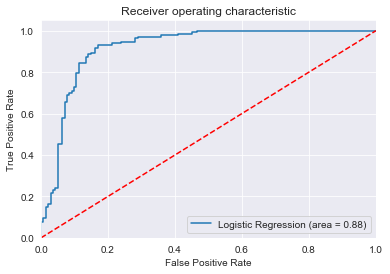

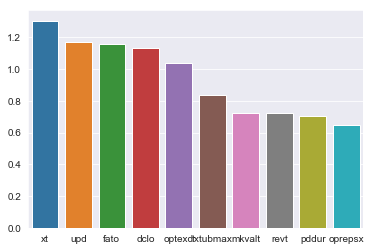

In [405]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
feature_importance = pd.Series(clf.steps[1][1].coef_[0], index = X.columns).sort_values(ascending = False)[:10]
#print(feature_importance)
sns.barplot(feature_importance.index, feature_importance.values)

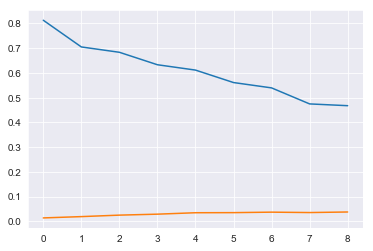

In [874]:
plt.plot(recalls)
plt.plot(precisions)

In [812]:
sampled_neg_train_y == 0

139361    True
14911     True
37501     True
170630    True
12469     True
          ... 
4560      True
24121     True
48153     True
120766    True
147409    True
Name: target_y, Length: 318, dtype: bool

In [813]:
sampled_neg_train_x = neg_train_x[sampled_neg_train_y == 0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [795]:
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0,))

In [ ]:
neg_class_ = neg_class.sample(n = pos_class.shape[0])
new_x = pd.concat([pos_class, neg_class_]).sample(frac=1).reset_index(drop=True)

In [499]:
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0,))

In [500]:
clf.fit(X,y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=0, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [504]:
g = pd.Series(clf.steps[1][1].coef_[0], index = X.columns).sort_values(ascending = False)

In [515]:
g.to_csv("new_feature_sig.csv", index = False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [517]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

61805     1
68243     1
143787    1
72        1
89261     1
         ..
39759     1
142930    1
7228      1
105033    1
57191     1
Name: target_y, Length: 349, dtype: int64

In [530]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X_train, y_train)

In [623]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0)

In [624]:
len(y_train[y_train == 1])/len(y_train)

0.0028477475051610322

In [625]:
clf3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [627]:
y_pred2 = clf3.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf3.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 1.00
[[52416     0]
 [  107     1]]


In [626]:
pd.Series(clf3.feature_importances_, index = X_test.columns).sort_values(ascending = False)[:40]

cshtr_f         0.022110
cshtr_c         0.021835
revt            0.017947
txc             0.017697
mkvalt          0.015686
gdwl            0.015664
intan           0.013589
caps            0.012867
clg             0.012201
tstkc           0.011499
tstk            0.010115
xlr             0.009626
dlc             0.008900
seq             0.008864
emp             0.008546
txtubpospdec    0.008150
mrc4            0.008082
re              0.007923
ceq             0.007871
cik             0.007289
mrc5            0.007280
spi             0.007038
teq             0.006919
txdfed          0.006713
xt              0.006657
mrc3            0.006467
dvc             0.006412
invt            0.006023
xsga            0.006010
gvkey           0.005911
txbcof          0.005795
intano          0.005697
rpag            0.005650
ch              0.005622
mrc2            0.005530
mrct            0.005437
mrcta           0.005414
ob              0.005393
stkcpa          0.005190
prstkc          0.005156


In [618]:
y_pred2 = clf3.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf3.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [619]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

[[52416     0]
 [  108     0]]


In [605]:
X.shape

(1307, 421)

the meaning of this feature is : [' Common Shares Traded - Annual - CalendarCSHTR_']
percent of nan of cshtr_c: 0.10839801915728507


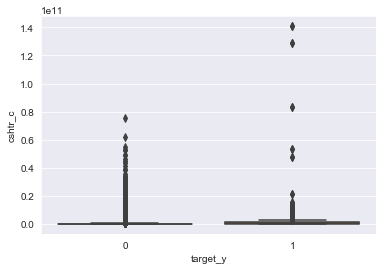

In [614]:
plot_('cshtr_c')

In [531]:
y_pred1 = clf2.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf2.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [540]:
pd.Series(clf2.feature_importances_, index = X_test.columns).sort_values(ascending = False)[:40]

gdwl             0.026435
dlc              0.025276
mkvalt           0.021400
optvol           0.019290
emp              0.018660
txfed            0.016150
cshtr_f          0.015531
cstk             0.014764
spi              0.013741
prcc_f           0.012877
dcs              0.011439
revt             0.011161
intpn            0.010774
intano           0.010727
gvkey            0.010677
txtubsoflimit    0.010432
gind             0.010388
rect             0.009749
ppent            0.009673
xlr              0.009558
prcl_c           0.009464
caps             0.009454
aqd              0.009227
cld3             0.009220
txtubadjust      0.009120
secu             0.009056
mrcta            0.008811
invrm            0.008746
cshpri           0.008621
mrc2             0.008322
xint             0.008269
invt             0.008119
apalch           0.007886
sppiv            0.007852
txtubxintbs      0.007702
aqc              0.007700
drc              0.007549
ceq              0.007521
xido        

In [573]:
X

,gvkey,datadate,fyear,ajex,ajp,currtr,fyr,ismod,ltcm,pddur,...,gsector,gsubind,naics,priusa,sic,spcindcd,spcseccd,stko,ipodate,target_y
439,1414,20091231,2009.0,1.0000,1.0000,1.0000,12.0,1.346927,8.289762,12.0,...,40.0,40301020.0,524113.0,2.000000,6311,447.00000,976.000000,0.0,2.001013e+07,0.0
1155,2006,20091231,2009.0,1.0000,1.0000,1.0000,12.0,1.000000,8.289762,12.0,...,45.0,45102010.0,511210.0,3.000000,7372,185.00000,940.000000,0.0,2.001013e+07,NaN
1670,2484,20080531,2007.0,1.0000,1.0000,1.0000,5.0,1.000000,8.289762,12.0,...,25.0,25504010.0,448140.0,4.000000,5651,452.00000,976.000000,3.0,2.001013e+07,NaN
3070,3801,20081231,2008.0,1.0000,1.0000,1.0000,12.0,1.000000,8.289762,12.0,...,20.0,20201050.0,561730.0,1.000000,700,112.00000,970.000000,3.0,2.001013e+07,NaN
5117,5726,20051231,2005.0,1.0000,1.0000,1.0000,12.0,1.000000,8.289762,12.0,...,25.0,25401040.0,511130.0,4.000000,2731,410.00000,976.000000,3.0,2.001013e+07,NaN
5375,5968,20101231,2010.0,1.0000,1.0000,1.0000,12.0,1.000000,8.289762,12.0,...,15.0,15104050.0,423510.0,3.000000,5051,358.00000,925.000000,0.0,2.001013e+07,NaN
6258,6741,20071231,2007.0,1.0000,1.0000,1.0000,12.0,1.000000,8.289762,12.0,...,45.0,45301020.0,334413.0,1.000000,3674,453.00000,940.000000,3.0,2.001013e+07,NaN
6997,7422,20051231,2005.0,0.0667,0.0667,1.0000,12.0,1.000000,8.289762,12.0,...,10.0,10102020.0,211130.0,4.000000,1311,380.00000,935.000000,3.0,2.006021e+07,NaN
7348,7761,20081231,2008.0,1.0000,1.0000,1.0000,12.0,1.000000,8.289762,12.0,...,25.0,25301040.0,722513.0,4.000000,5812,420.00000,978.000000,3.0,2.001013e+07,NaN
8642,8818,20111231,2011.0,1.0000,1.0000,1.0000,12.0,3.000000,8.289762,12.0,...,55.0,55103010.0,2211.0,8.000000,4931,705.00000,700.000000,3.0,2.001013e+07,NaN


In [578]:
X['target_y'] = y

In [570]:
def plot_(feature, D = False, V = 0):
    if D:
        X.drop(X[X[feature] > V].index, axis = 0, inplace = True)
    ax = sns.boxplot(x="target_y", y=feature, data=X)
    print("the meaning of this feature is : {}".format(feature_exp[feature_exp.code == feature].explanation.values))
    print("percent of nan of {}: {}".format(feature, nan_info[nan_info['Original Name'] == feature].Percent.values[0]))

the meaning of this feature is : [' Revenue - Total']
percent of nan of revt: 0.19887249610171528


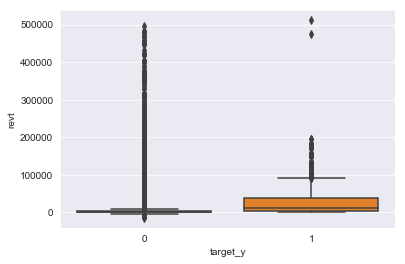

In [579]:
plot_('revt')

the meaning of this feature is : [' Market Value - Total - Fiscal']
percent of nan of mkvalt: 0.3564831474151373


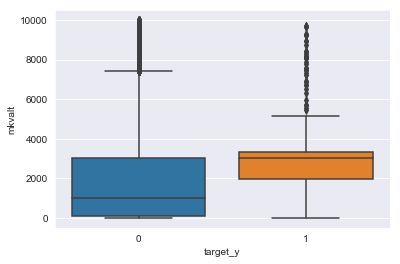

In [580]:
plot_("mkvalt", True, 10000)

the meaning of this feature is : [' Goodwill']
percent of nan of gdwl: 0.2140486757255379


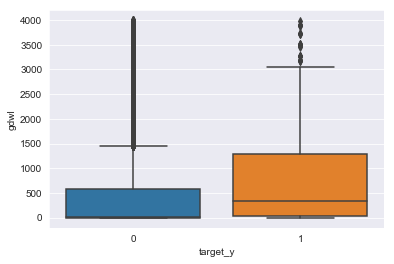

In [546]:
plot_('gdwl', True, 4000)

the meaning of this feature is : [' Interest Paid Net']
percent of nan of intpn: 0.41582846404724777


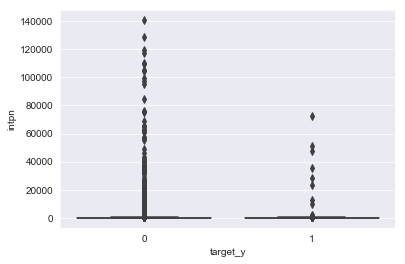

In [585]:
plot_('intpn')

In [534]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

[[52264   152]
 [   92    16]]


In [535]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52416
           1       0.10      0.15      0.12       108

    accuracy                           1.00     52524
   macro avg       0.55      0.57      0.56     52524
weighted avg       1.00      1.00      1.00     52524



In [518]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Accuracy of logistic regression classifier on test set: 1.00


In [520]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52416
           1       0.40      0.06      0.10       108

    accuracy                           1.00     52524
   macro avg       0.70      0.53      0.55     52524
weighted avg       1.00      1.00      1.00     52524



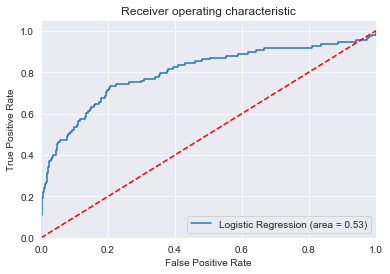

In [521]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

the meaning of this feature is : []
percent of nan of dp: 0.2329489310417702


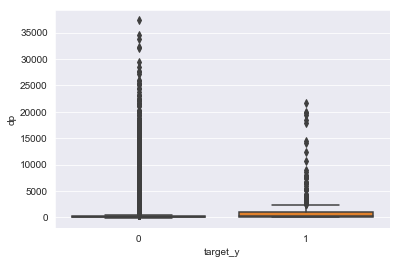

In [633]:
plot_("dp")

In [493]:
pd.Series(clf.steps[1][1].coef_[0], index = X.columns).sort_values(ascending = False)

xt        3.234835e-06
xlr       2.641451e-06
rpag      1.618935e-06
ob        1.332475e-06
cmp       8.569271e-07
              ...     
priusa   -9.698786e-07
pstkr    -1.327614e-06
xido     -3.333739e-06
pstkn    -4.334518e-06
do       -1.204725e-05
Length: 420, dtype: float64

In [33]:
num_col.fillna(num_col.mean(), inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [34]:
num_col.isnull().any()

gvkey       False
datadate    False
fyear       False
ajex        False
ajp         False
            ...  
spcindcd    False
spcseccd    False
stko        False
ipodate     False
target_y    False
Length: 421, dtype: bool

In [183]:
dict1 = dict()

In [35]:
from sklearn.linear_model import LogisticRegression
y = num_col.target_y
X = num_col.drop(['target_y'], axis=1)

In [178]:
feature_exp = pd.read_csv("columns_explanation.csv")

In [179]:
feature_exp['code'] = feature_exp.code.apply(lambda x : x.lower())

In [635]:
num_col.shape

(175077, 421)

In [642]:
neg_class = num_col[num_col.target_y == 0]

In [643]:
neg_class.shape

(174620, 421)

In [39]:
pos_class = num_col[num_col.target_y == 1]

In [645]:
pos_class.shape

(457, 421)

In [649]:
def test_null(data):
    return data.isnull().any().any()

In [663]:
X = X.fillna(X.mean())
pos_class = pos_class.fillna(pos_class.mean())
neg_class = neg_class.fillna(neg_class.mean())

In [664]:
test_null(X)

False

In [734]:
num_col_1 = num_col.copy()

In [739]:
num_col_1 = num_col_1.fillna(num_col_1.mean())

In [740]:
sampled = num_col_1.sample(frac = 0.2).reset_index(drop = True)

In [744]:
sampled[sampled.target_y == 1].shape[0]/len(sampled)

0.0027702413251463657

In [746]:
sampled_x = sampled.drop(['target_y'], axis = 1)

In [747]:
sampled_y = sampled.target_y

In [749]:
sampled_predict = clf.predict(sampled_x)

In [751]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(sampled_x, sampled_y)))

Accuracy of logistic regression classifier on test set: 0.85


In [755]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(sampled_y, sampled_predict)
print(confusion_matrix)
print(classification_report(sampled_y, sampled_predict))

[[29736  5182]
 [   12    85]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     34918
           1       0.02      0.88      0.03        97

    accuracy                           0.85     35015
   macro avg       0.51      0.86      0.48     35015
weighted avg       1.00      0.85      0.92     35015



In [756]:
(5182 + 85)/(29736 + 5182 + 12 + 85)

0.15042124803655577

In [678]:
clf = make_pipeline(StandardScaler(), LogisticRegression())

In [ ]:
train_test_split(X, y_, test_size=0.3, random_state=0)

In [69]:
#####################################################################################################################
#####################################################################################################################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
neg_class_ = neg_class.sample(n = pos_class.shape[0])
new_x = pd.concat([pos_class, neg_class_]).sample(frac=1).reset_index(drop=True)
X = new_x.drop(['target_y'], axis = 1)
y_ = new_x['target_y']
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
feature_importance = pd.Series(clf.steps[1][1].coef_[0], index = X.columns).sort_values(ascending = False)[:10]
#print(feature_importance)
sns.barplot(feature_importance.index, feature_importance.values)

NameError: name 'neg_class' is not defined

In [728]:
clf.predict_proba(X_test.loc[252])

gvkey          60990.0
datadate    20081231.0
fyear           2008.0
ajex               1.0
ajp                1.0
               ...    
sic             6020.0
spcindcd         817.0
spcseccd         800.0
stko               3.0
ipodate     19950713.0
Name: 252, Length: 420, dtype: float64

In [732]:
X_test

,gvkey,datadate,fyear,ajex,ajp,currtr,fyr,ismod,ltcm,pddur,...,gind,gsector,gsubind,naics,priusa,sic,spcindcd,spcseccd,stko,ipodate
252,60990,20081231,2008.0,1.00,1.00,1.0000,12.0,1.346947,8.289735,12.0,...,401010.000000,40.000000,4.010102e+07,522110.000000,1.0,6020,817.000000,800.000000,3.000000,1.995071e+07
695,66210,20161231,2016.0,1.00,1.00,1.0000,12.0,1.346947,8.289735,12.0,...,401010.000000,40.000000,4.010102e+07,522110.000000,1.0,6020,491.959251,882.320307,0.000000,2.001020e+07
144,10639,20160131,2015.0,1.00,1.00,1.0000,1.0,1.000000,9.000000,12.0,...,255040.000000,25.000000,2.550404e+07,451120.000000,3.0,5945,449.000000,976.000000,3.000000,2.001013e+07
748,137432,20110630,2011.0,1.00,1.00,1.0000,6.0,1.000000,9.000000,12.0,...,252030.000000,25.000000,2.520301e+07,315.000000,1.0,2300,465.000000,976.000000,0.000000,2.000063e+07
145,13554,20081231,2008.0,1.00,1.00,1.0000,12.0,1.000000,8.289735,12.0,...,252030.000000,25.000000,2.520302e+07,3162.000000,1.0,3140,455.000000,976.000000,0.000000,1.987063e+07
372,184498,20141231,2014.0,1.00,1.00,1.0000,12.0,3.000000,9.000000,12.0,...,401020.000000,40.000000,4.010201e+07,522292.000000,1.0,6162,491.959251,882.320307,0.000000,2.012031e+07
55,2136,20061231,2006.0,1.00,1.00,1.0000,12.0,1.000000,8.289762,12.0,...,501010.000000,50.000000,5.010102e+07,517312.000000,1.0,4812,715.000000,974.000000,0.000000,2.001013e+07
910,187315,20111231,2011.0,1.00,1.00,1.0000,12.0,1.346947,8.289735,12.0,...,330172.235107,32.853491,3.301724e+07,525910.000000,1.0,6722,491.959251,882.320307,0.695589,2.001020e+07
97,182209,20130630,2013.0,1.00,1.00,1.0000,6.0,1.000000,9.000000,12.0,...,101010.000000,10.000000,1.010102e+07,213112.000000,1.0,1382,491.959251,882.320307,0.000000,2.001020e+07
14,4990,20110131,2010.0,1.00,1.00,1.0000,1.0,1.000000,8.289762,12.0,...,255040.000000,25.000000,2.550401e+07,448140.000000,1.0,5651,452.000000,976.000000,0.000000,2.001013e+07


In [731]:
clf.predict_proba(X_test)

array([[9.75175342e-01, 2.48246583e-02],
       [8.77279750e-01, 1.22720250e-01],
       [1.56673181e-02, 9.84332682e-01],
       [7.00572301e-01, 2.99427699e-01],
       [4.77290481e-01, 5.22709519e-01],
       [7.15762078e-02, 9.28423792e-01],
       [1.80207338e-09, 9.99999998e-01],
       [9.97745876e-01, 2.25412439e-03],
       [9.80578569e-01, 1.94214305e-02],
       [5.80654417e-04, 9.99419346e-01],
       [9.26093976e-01, 7.39060237e-02],
       [2.93941584e-01, 7.06058416e-01],
       [5.87343879e-01, 4.12656121e-01],
       [1.01069944e-02, 9.89893006e-01],
       [9.97808838e-01, 2.19116246e-03],
       [5.97744439e-01, 4.02255561e-01],
       [9.98959248e-01, 1.04075198e-03],
       [1.31359991e-01, 8.68640009e-01],
       [9.34959529e-01, 6.50404712e-02],
       [4.23465964e-01, 5.76534036e-01],
       [1.65167755e-06, 9.99998348e-01],
       [9.13652271e-01, 8.63477293e-02],
       [5.96135561e-05, 9.99940386e-01],
       [9.79896038e-01, 2.01039623e-02],
       [0.000000

In [666]:
clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=0, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

Accuracy of logistic regression classifier on test set: 0.84
[[126  17]
 [ 27 105]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       143
           1       0.86      0.80      0.83       132

    accuracy                           0.84       275
   macro avg       0.84      0.84      0.84       275
weighted avg       0.84      0.84      0.84       275



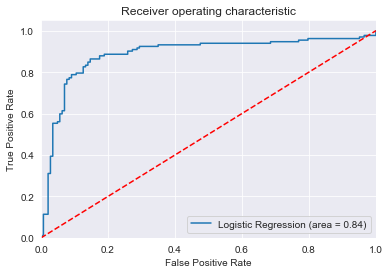

In [667]:
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [306]:
neg_class

,gvkey,datadate,fyear,ajex,ajp,currtr,fyr,ismod,ltcm,pddur,...,gsector,gsubind,naics,priusa,sic,spcindcd,spcseccd,stko,ipodate,target_y
0,1004,20050531,2004.0,1.000,1.000,1.0,5.0,1.000000,8.289762,12.0,...,20.0,20101010.0,423860.0,1.0,5080,110.00000,925.000000,0.0,1.988010e+07,0
1,1004,20060531,2005.0,1.000,1.000,1.0,5.0,1.000000,8.289762,12.0,...,20.0,20101010.0,423860.0,1.0,5080,110.00000,925.000000,0.0,1.988010e+07,0
2,1004,20070531,2006.0,1.000,1.000,1.0,5.0,1.000000,8.289762,12.0,...,20.0,20101010.0,423860.0,1.0,5080,110.00000,925.000000,0.0,1.988010e+07,0
3,1004,20080531,2007.0,1.000,1.000,1.0,5.0,1.000000,8.289762,12.0,...,20.0,20101010.0,423860.0,1.0,5080,110.00000,925.000000,0.0,1.988010e+07,0
4,1004,20090531,2008.0,1.000,1.000,1.0,5.0,1.000000,8.289762,12.0,...,20.0,20101010.0,423860.0,1.0,5080,110.00000,925.000000,0.0,1.988010e+07,0
5,1004,20100531,2009.0,1.000,1.000,1.0,5.0,1.000000,8.289762,12.0,...,20.0,20101010.0,423860.0,1.0,5080,110.00000,925.000000,0.0,1.988010e+07,0
6,1004,20110531,2010.0,1.000,1.000,1.0,5.0,1.000000,8.289762,12.0,...,20.0,20101010.0,423860.0,1.0,5080,110.00000,925.000000,0.0,1.988010e+07,0
7,1013,20051031,2005.0,1.000,1.000,1.0,10.0,1.000000,8.289762,12.0,...,45.0,45201020.0,334210.0,1.0,3661,180.00000,940.000000,0.0,1.979032e+07,0
8,1013,20061031,2006.0,1.000,1.000,1.0,10.0,1.000000,8.289762,12.0,...,45.0,45201020.0,334210.0,1.0,3661,180.00000,940.000000,0.0,1.979032e+07,0
9,1013,20071031,2007.0,1.000,1.000,1.0,10.0,1.000000,8.289762,12.0,...,45.0,45201020.0,334210.0,1.0,3661,180.00000,940.000000,0.0,1.979032e+07,0


In [313]:
num_col.revt.describe()

count    175077.000000
mean       3123.589788
std       13189.017667
min      -15009.328000
25%          28.839000
50%         353.956000
75%        3123.589788
max      511729.000000
Name: revt, dtype: float64

In [393]:
nan_info = pd.read_csv("nan_info.csv")

In [394]:
nan_info.head()

,Unnamed: 0,Total,Percent,Original Name
0,gvkey,0,0.000000,gvkey
1,datadate,0,0.000000,datadate
2,Data Year - Fiscal,859,0.004906,fyear
3,indfmt,0,0.000000,indfmt
4,consol,0,0.000000,consol


the meaning of this feature is : [' Auditor Opinion - Internal Control']
percent of nan of auopic: 0.2368215128200735


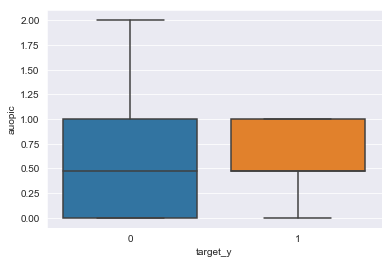

In [447]:
plot_("auopic")

the meaning of this feature is : [' Standard Industrial Classification - Historica']
percent of nan of sich: 0.3147529372790258


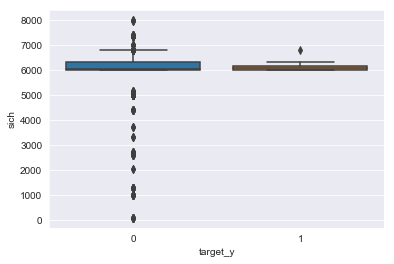

In [449]:
plot_("sich")

the meaning of this feature is : [' Revenue - Total']
percent of nan of revt: 0.19887249610171528


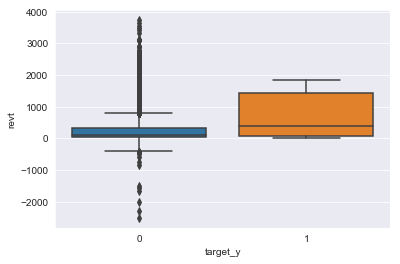

In [451]:
plot_("revt", True, 4000)

percent of nan of xt: 0.9042192863711396


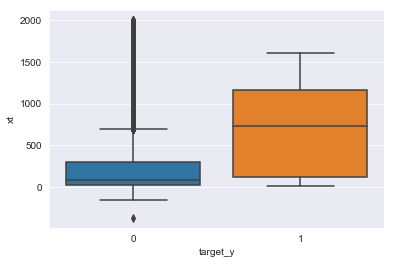

In [441]:
plot_("xt")

the meaning of this feature is : [' Staff Expense - Total']
percent of nan of xlr: 0.7505611816515019


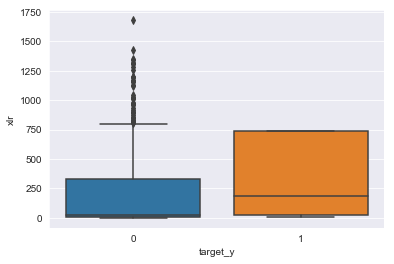

In [494]:
plot_("xlr")

the meaning of this feature is : [' Current Assets of Discontinued Operations']
percent of nan of do: 0.1986326016552717


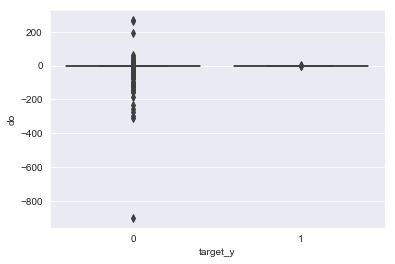

In [498]:
plot_("do")

In [349]:
num_col['new_revt'] = StandardScaler().fit_transform(num_col['revt'].values.reshape(-1, 1))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


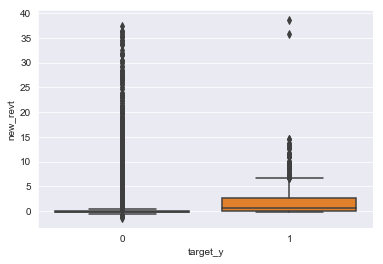

In [350]:
ax = sns.boxplot(x="target_y", y="new_revt", data=num_col)

In [351]:
test_num_col = num_col.copy()

In [361]:
len(num_col[num_col.revt > 100000].index)

Int64Index([   522,    523,    524,    525,    526,    527,    809,   1303,
              1304,   1305,
            ...
            172978, 172979, 172983, 173194, 173195, 173215, 173216, 173261,
            173262, 173263],
           dtype='int64', length=625)

In [375]:
test_num_col.drop(test_num_col[test_num_col.revt > 20000].index, axis = 0, inplace = True)

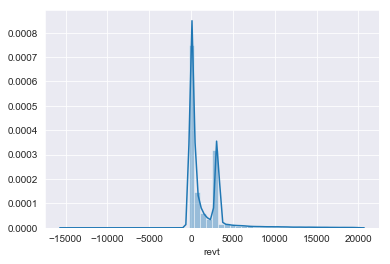

In [376]:
sns.distplot(test_num_col.revt)

the meaning of this feature is : [' Revenue - Total']
percent of nan of revt: 0.19887249610171528


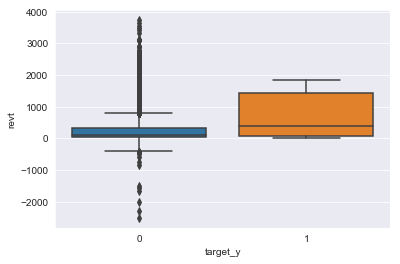

In [456]:
plot_("revt")

the meaning of this feature is : [' Employees']
percent of nan of emp: 0.3165978398076275


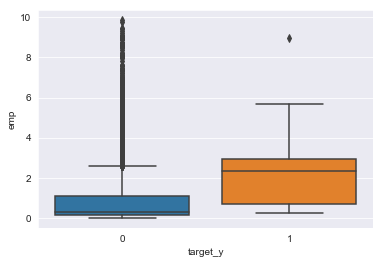

In [455]:
plot_("emp")

the meaning of this feature is : [' Nonrecurring Income Taxes After-tax']
percent of nan of xt: 0.9042192863711396


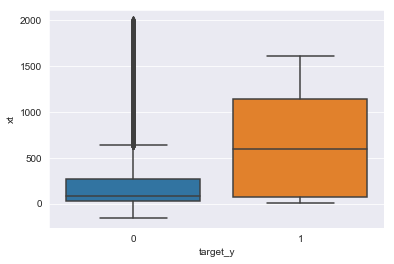

In [457]:
plot_("xt")

the meaning of this feature is : []
percent of nan of am: 0.40037240756924103


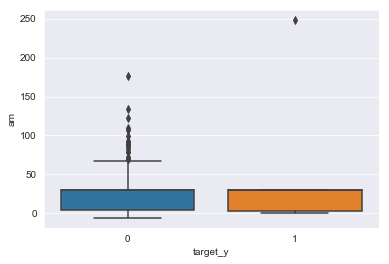

In [458]:
plot_("am")

the meaning of this feature is : [' Intangible Assets - Total']
percent of nan of intan: 0.2087424390411076


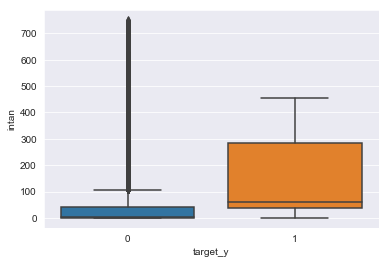

In [459]:
plot_("intan", True, 750)

the meaning of this feature is : [' Other Intangibles']
percent of nan of intano: 0.2288935725423671


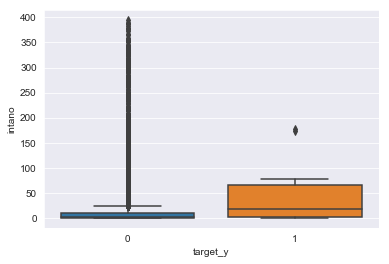

In [461]:
plot_("intano", True, 400)

the meaning of this feature is : [' Core Post Retirement Adjustment']
percent of nan of rca: 0.868931955653798


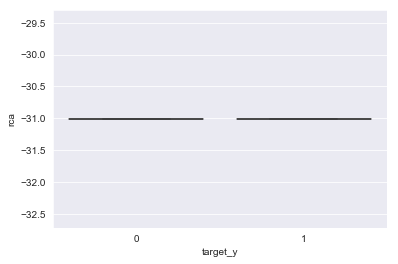

In [470]:
plot_("rca", True, 20)

In [385]:
test_num_col.drop(test_num_col[test_num_col.dc > 500].index, axis = 0, inplace = True)

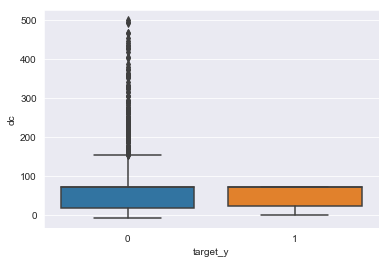

In [386]:
ax = sns.boxplot(x="target_y", y="dc", data=test_num_col)

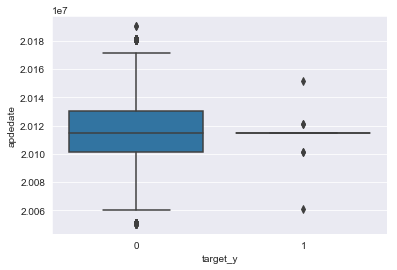

In [387]:
ax = sns.boxplot(x="target_y", y="apdedate", data=test_num_col)

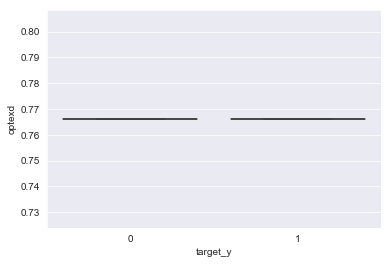

In [388]:
sns.boxplot(x="target_y", y="optexd", data=test_num_col)

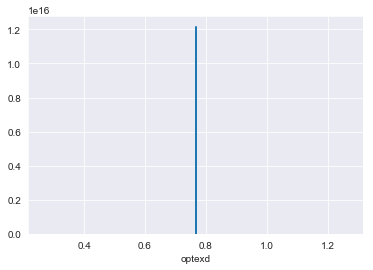

In [389]:
sns.distplot(test_num_col.optexd)

In [40]:
pos_class.shape

(457, 421)

In [324]:
clf = make_pipeline(RobustScaler(), LogisticRegression(random_state=0, penalty='l1', solver = 'saga'))

In [325]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
upd,28.725618154678717
auopic,12.282459178024904
apdedate,9.611858043866256
sich,8.396676151965728
spcseccd,6.136079598179523
mkvalt,5.225135584557927
emp,4.337368834619007
xpp,3.463428303883879
sic,3.195049620665934
naics,3.0342050881755607
cogs,2.854358650170193
stko,2.788474350089796
xopr,2.6269403492764747
dclo,2.591967934664794
pddur,2.567608783164307
xsga,2.5414421541739847
ch,2.4047831938956046

In [326]:
times_ = 1
for i in range(times_):
    neg_class_ = neg_class.sample(n = pos_class.shape[0])
    new_x = pd.concat([pos_class, neg_class_]).sample(frac=1).reset_index(drop=True)
    X = new_x.drop(['target_y'], axis = 1)
    y_ = new_x['target_y']
    clf.fit(X, y_)
    dict2 = pd.Series(clf.steps[1][1].coef_[0], index = X.columns).to_dict()
    dict1 = {key: (dict1.get(key, 0) + dict2.get(key, 0))
          for key in set(dict1) | set(dict2)}
    #feature_sig = pd.Series(dict2).sort_values(ascending = False)
    #total_sig = pd.Series(dict1).sort_values(ascending = False)
dict1 = { a: dict1[a]/times_ for a in dict1}

In [ ]:
neg_class_ = neg_class.sample(n = pos_class.shape[0])
new_x = pd.concat([pos_class, neg_class_]).sample(frac=1).reset_index(drop=True)

In [327]:
pd.Series(dict1).sort_values(ascending = False).to_csv("aaaa.csv")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [236]:
feature_sig

xt        2.265514
lco       1.864332
revt      1.274508
donr      0.919308
xrent     0.864207
            ...   
nopio    -0.761826
optca    -0.866988
xrd      -0.868935
priusa   -0.889130
scf      -1.094245
Length: 420, dtype: float64

In [237]:
total_sig

xt          6.963167
revt        4.106088
fato        3.806366
am          3.777497
apdedate    3.224440
              ...   
fdate      -2.529419
tstkp      -2.573483
priusa     -3.226635
scf        -3.899853
cstk       -4.219426
Length: 420, dtype: float64

In [272]:
feature_sig = pd.Series(dict1).sort_values(ascending = False)

In [273]:
feature_sig = pd.DataFrame(feature_sig, columns = ['coef_'])

In [274]:
feature_sig

,coef_
revt,2.093318
xt,1.241226
upd,0.723383
dc,0.635618
apdedate,0.605095
optexd,0.558346
fato,0.543165
xpp,0.478929
auopic,0.432562
am,0.424531


In [275]:
feature_sig['feature_code'] = feature_sig.index

In [276]:
feature_sig = feature_sig.reset_index(drop = True)

In [279]:
feature_sig = feature_sig[['feature_code', 'coef_']]

In [280]:
feature_sig['feature_explan'] = feature_sig.feature_code.apply(lambda x: feature_exp[feature_exp.code == x].explanation.values)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [281]:
feature_sig

,feature_code,coef_,feature_explan
0,revt,2.093318,[ Revenue - Total]
1,xt,1.241226,[ Nonrecurring Income Taxes After-tax]
2,upd,0.723383,[ Update Code]
3,dc,0.635618,[]
4,apdedate,0.605095,"[ Actual Period End date, Actual Period End d..."
5,optexd,0.558346,[ Options - Exercised (-)]
6,fato,0.543165,"[ Property, Plant, and Equipment Other at Cost]"
7,xpp,0.478929,[ Prepaid Expenses]
8,auopic,0.432562,[ Auditor Opinion - Internal Control]
9,am,0.424531,[]


In [282]:
feature_sig.to_csv("feature_sig.csv", index=False)

In [304]:
num_col.revt.describe()

count    175077.000000
mean       3123.589788
std       13189.017667
min      -15009.328000
25%          28.839000
50%         353.956000
75%        3123.589788
max      511729.000000
Name: revt, dtype: float64

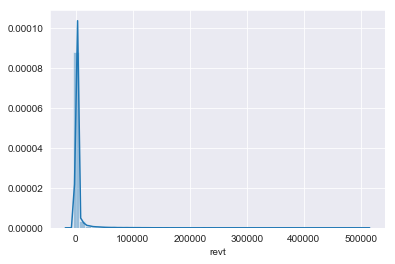

In [305]:
sns.distplot(num_col.revt)

In [296]:
np.log1p(num_col.revt).describe()

count    174822.000000
mean          5.415084
std           2.931057
min          -4.605170
25%           3.407039
50%           5.879089
75%           8.047058
max          13.145552
Name: revt, dtype: float64